In [1]:
import sys
import warnings
# 忽略所有警告
warnings.filterwarnings('ignore')
sys.path.append('/Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision')
import glaucoma_vision
import os
import torch
from glaucoma_vision.utils.dl_utils import (
    get_device,
    preprocess_dl_image,
    load_dl_model,
    GlaucomaDLDataset,
    dl_model_inference
)

In [2]:
# 模型权重文件夹
WEIGHTS_DIR = "/Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights" 

# 验证集图像文件夹
VAL_DIR='/Users/apple/Desktop/BIA 4/Fundus_Scanes_Sorted/Validation'

# CSV 文件
CSV_PATH='/Users/apple/Desktop/BIA 4/glaucoma.csv.xls'

SAVE_DIR = '/Users/apple/Desktop/BIA 4/ICA'  # 模型评估曲线保存地址

In [3]:
from glaucoma_vision.models.evaluate_convnext import evaluate_convnext, convnext_integrate
CONV = os.path.join(WEIGHTS_DIR, 'convnext.pth')  # 模型权重文件路径
eval_results = evaluate_convnext(CONV, VAL_DIR, SAVE_DIR)

[ConvNeXt Evaluator] Loading validation dataset...
Validation Classes Mapping: {'Glaucoma_Negative': 0, 'Glaucoma_Positive': 1}
Validation Samples: 130
[ConvNeXt Evaluator] Loading model architecture and weights from /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/convnext.pth...
[ConvNeXt Evaluator] Model loaded successfully.
[ConvNeXt Evaluator] Running inference on validation set...

Classification Report
                   precision    recall  f1-score   support

Glaucoma_Negative       0.83      0.77      0.80        96
Glaucoma_Positive       0.46      0.56      0.51        34

         accuracy                           0.72       130
        macro avg       0.65      0.66      0.65       130
     weighted avg       0.74      0.72      0.72       130

Summary Metrics:
Accuracy Score: 0.7154
AUROC Score: 0.7093
AUPRC Score: 0.4380
Confusion Matrix -> TP: 19, TN: 74, FP: 22, FN: 15


Validation Classes Mapping: {'Glaucoma_Negative': 0, 'Glaucoma_Positive': 1}
Validation Samples: 130
Using device: mps
Loading integrated model from /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/convnext_integrated.pth...
Model weights loaded successfully.
Running inference on validation set...

Integrated Model Classification Report
                   precision    recall  f1-score   support

Glaucoma_Negative       0.78      0.83      0.81        96
Glaucoma_Positive       0.43      0.35      0.39        34

         accuracy                           0.71       130
        macro avg       0.61      0.59      0.60       130
     weighted avg       0.69      0.71      0.70       130



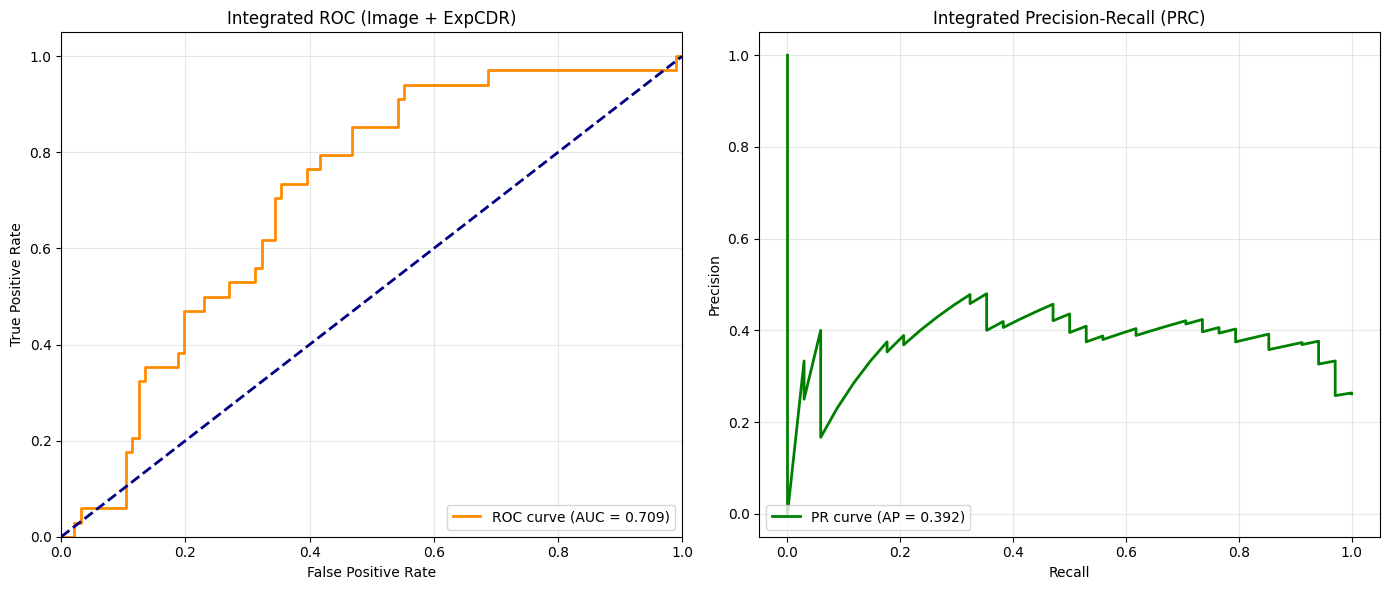

Summary Metrics:
AUROC Score: 0.7086
AUPRC Score: 0.3915


In [4]:
CONV_INT = os.path.join(WEIGHTS_DIR, 'convnext_integrated.pth')  # 模型权重文件路径
eval_results = convnext_integrate(CONV_INT, VAL_DIR, CSV_PATH, SAVE_DIR)

[DenseNet Evaluator] Using device: mps
[DenseNet Evaluator] Loading model from /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/densenet.pth...
[DenseNet Evaluator] Model loaded successfully.
Validation Classes Mapping: {'Glaucoma_Negative': 0, 'Glaucoma_Positive': 1}
[DenseNet Evaluator] Running inference on validation set...
Validation Samples: 130

DenseNet Classification Report
                   precision    recall  f1-score   support

Glaucoma_Negative      0.825     0.344     0.485        96
Glaucoma_Positive      0.300     0.794     0.435        34

         accuracy                          0.462       130
        macro avg      0.562     0.569     0.460       130
     weighted avg      0.688     0.462     0.472       130
Summary Metrics:
Accuracy Score: 0.4615
AUROC Score: 0.6143
AUPRC Score: 0.3372


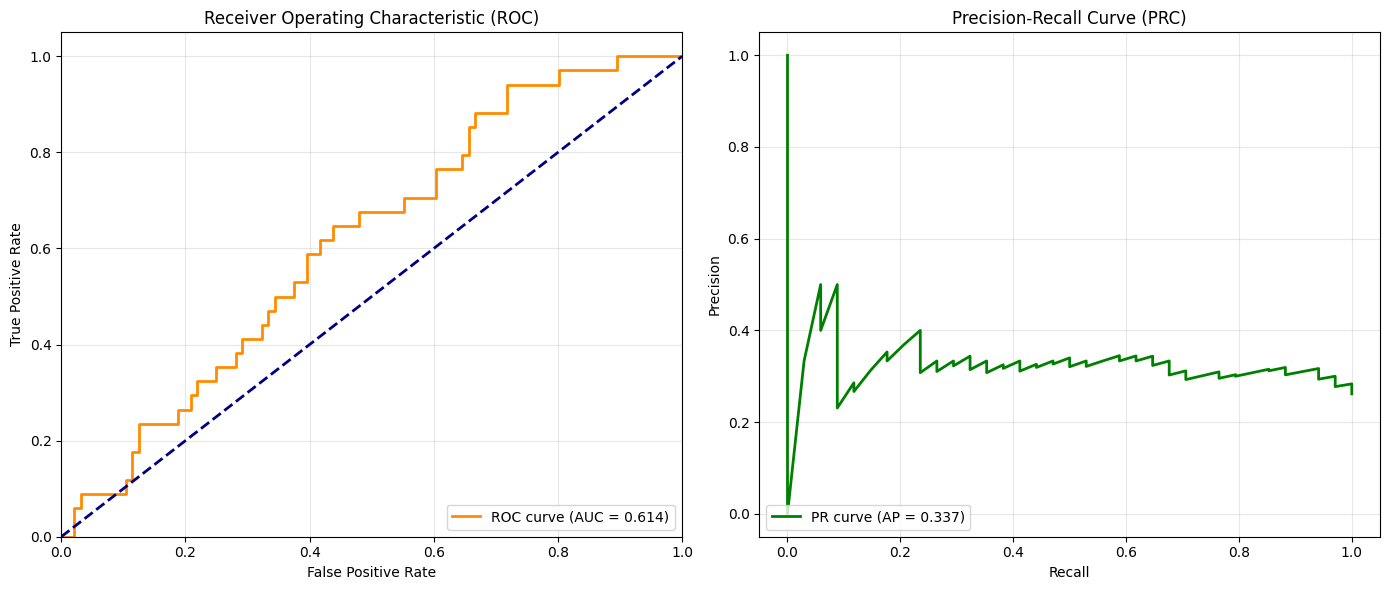

In [5]:
from glaucoma_vision.models.evaluate_densenet import evaluate_densenet, densenet_integrate  
DENSE_PATH = os.path.join(WEIGHTS_DIR, 'densenet.pth')  # 模型权重文件路径
eval_results = evaluate_densenet(DENSE_PATH, VAL_DIR, SAVE_DIR)

Using device: mps
Validation Classes Mapping: {'Glaucoma_Negative': 0, 'Glaucoma_Positive': 1}
Loading integrated model from /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/densenet_integrated.pth...
Model weights loaded successfully.
Running inference on validation set...
Validation Samples: 130

Integrated Model Classification Report
                   precision    recall  f1-score   support

Glaucoma_Negative      0.860     0.448     0.589        96
Glaucoma_Positive      0.338     0.794     0.474        34

         accuracy                          0.538       130
        macro avg      0.599     0.621     0.531       130
     weighted avg      0.723     0.538     0.559       130
Summary Metrics:
Accuracy Score: 0.5385
AUROC Score: 0.6412
AUPRC Score: 0.3455


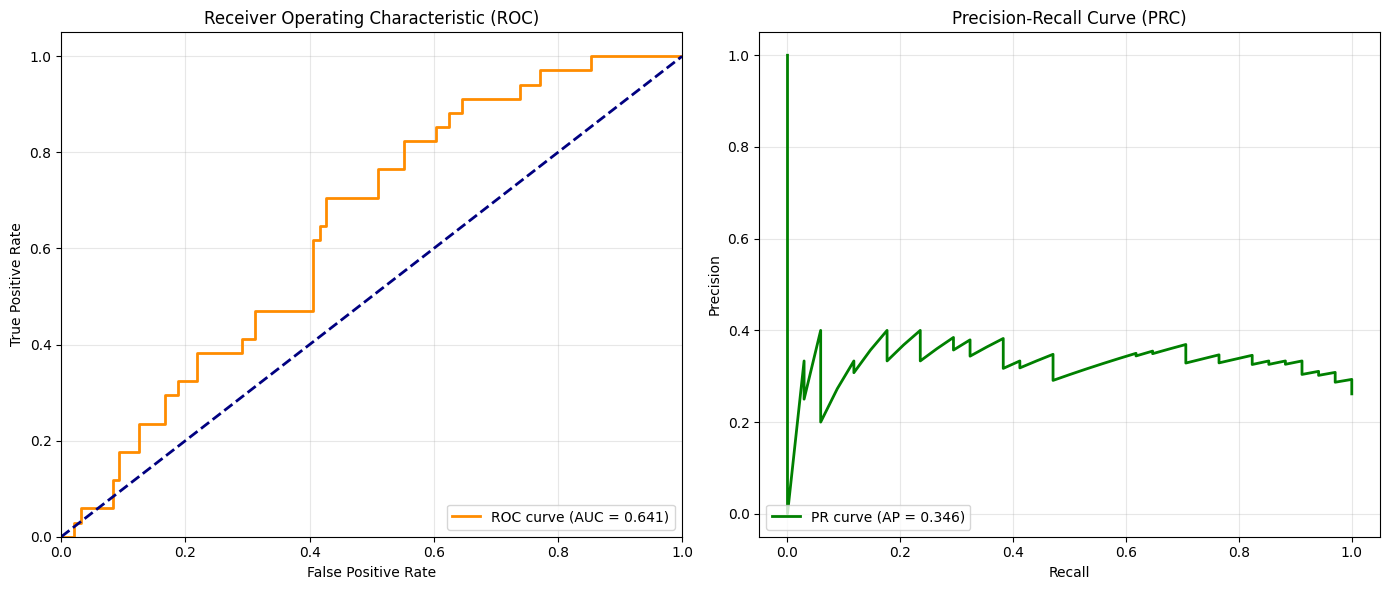

In [6]:
DENSE_INT_PATH = os.path.join(WEIGHTS_DIR, 'densenet_integrated.pth')  # 模型权重文件路径
eval_results = densenet_integrate(DENSE_INT_PATH, VAL_DIR, CSV_PATH, SAVE_DIR)

Using device: mps
Validation Classes Mapping: {'Glaucoma_Negative': 0, 'Glaucoma_Positive': 1}
Validation Samples: 130
Loading model from /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/resnet18.pth...
Model loaded successfully.
Running inference on validation set...

ResNet-18 Classification Report
                   precision    recall  f1-score   support

Glaucoma_Negative      0.850     0.708     0.773        96
Glaucoma_Positive      0.440     0.647     0.524        34

         accuracy                          0.692       130
        macro avg      0.645     0.678     0.648       130
     weighted avg      0.743     0.692     0.708       130
Summary Metrics:
Accuracy Score: 0.6923
AUROC Score: 0.7059
AUPRC Score: 0.4080


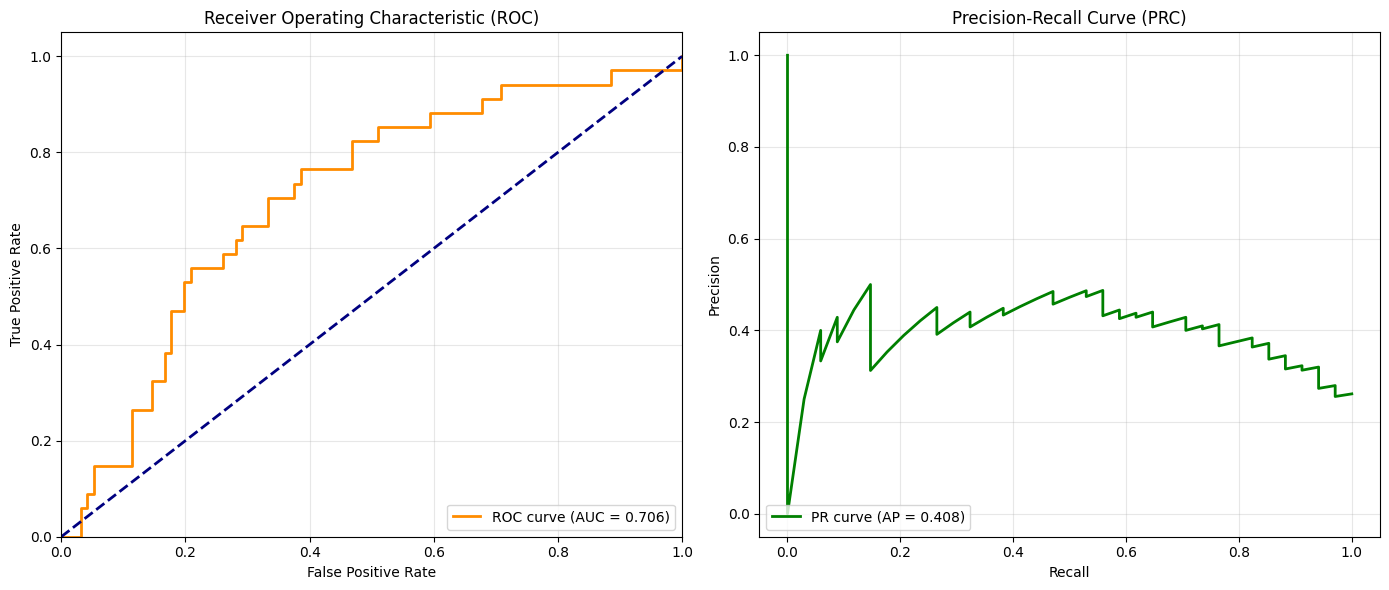

In [7]:
from glaucoma_vision.models.evaluate_resnet18 import evaluate_resnet18, resnet18_integrate
RES_PATH = os.path.join(WEIGHTS_DIR, 'resnet18.pth')  # 模型权重文件路径
eval_results= evaluate_resnet18(RES_PATH, VAL_DIR, SAVE_DIR)

Validation Classes Mapping: {'Glaucoma_Negative': 0, 'Glaucoma_Positive': 1}
Validation Samples: 130
Using device: mps
Loading integrated model from /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/resnet18_integrated.pth...
Model weights loaded successfully.
Running inference on validation set...

Integrated Model Classification Report
                   precision    recall  f1-score   support

Glaucoma_Negative      0.830     0.760     0.793        96
Glaucoma_Positive      0.452     0.559     0.500        34

         accuracy                          0.708       130
        macro avg      0.641     0.660     0.647       130
     weighted avg      0.731     0.708     0.717       130
Summary Metrics:
Accuracy Score: 0.7077
AUROC Score: 0.6792
AUPRC Score: 0.3713


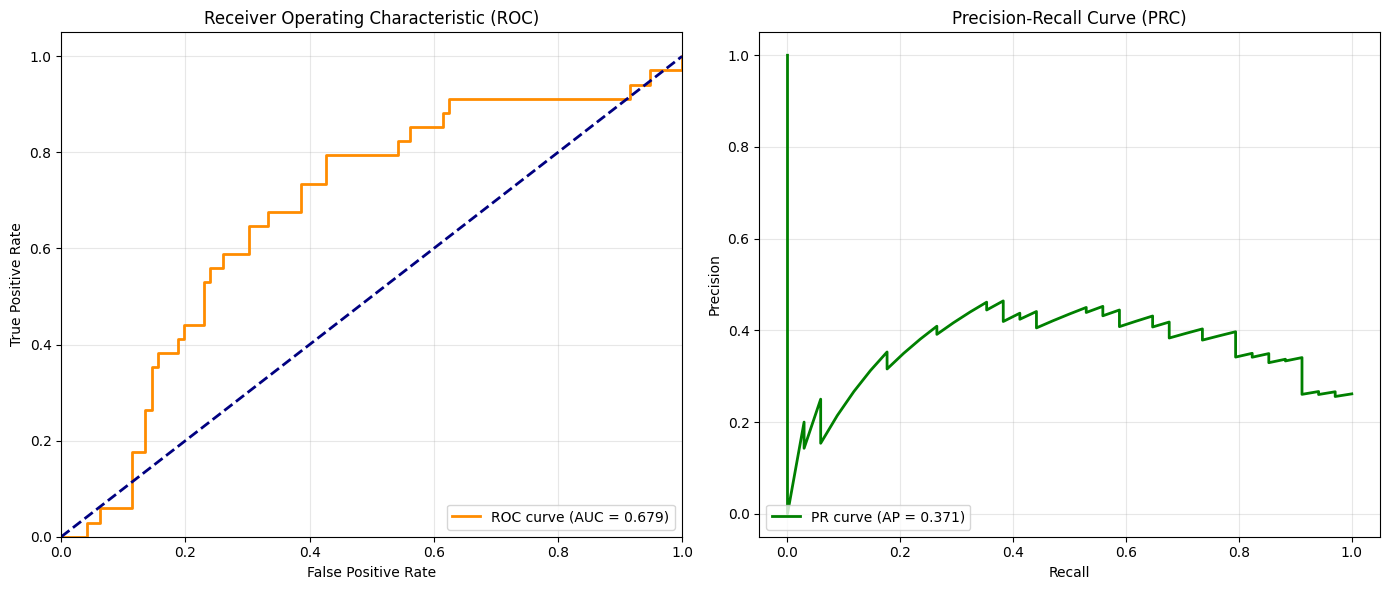

In [8]:
RES_INT_PATH = os.path.join(WEIGHTS_DIR, 'resnet18_integrated.pth')  # 模型权重文件路径
eval_results = resnet18_integrate(RES_INT_PATH, VAL_DIR, CSV_PATH, SAVE_DIR)

Using device: cpu
Validation Classes Mapping: {'Glaucoma_Negative': 0, 'Glaucoma_Positive': 1}
Validation Samples: 130
Loading model from /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/mobilenet.pth...
Model loaded successfully.
Running inference on validation set...

MobileNetV2 (Image Only) Classification Report
                   precision    recall  f1-score   support

Glaucoma_Negative      0.868     0.615     0.720        96
Glaucoma_Positive      0.403     0.735     0.521        34

         accuracy                          0.646       130
        macro avg      0.635     0.675     0.620       130
     weighted avg      0.746     0.646     0.668       130
Summary Metrics:
Accuracy Score: 0.6462
AUROC Score: 0.6942
AUPRC Score: 0.4298


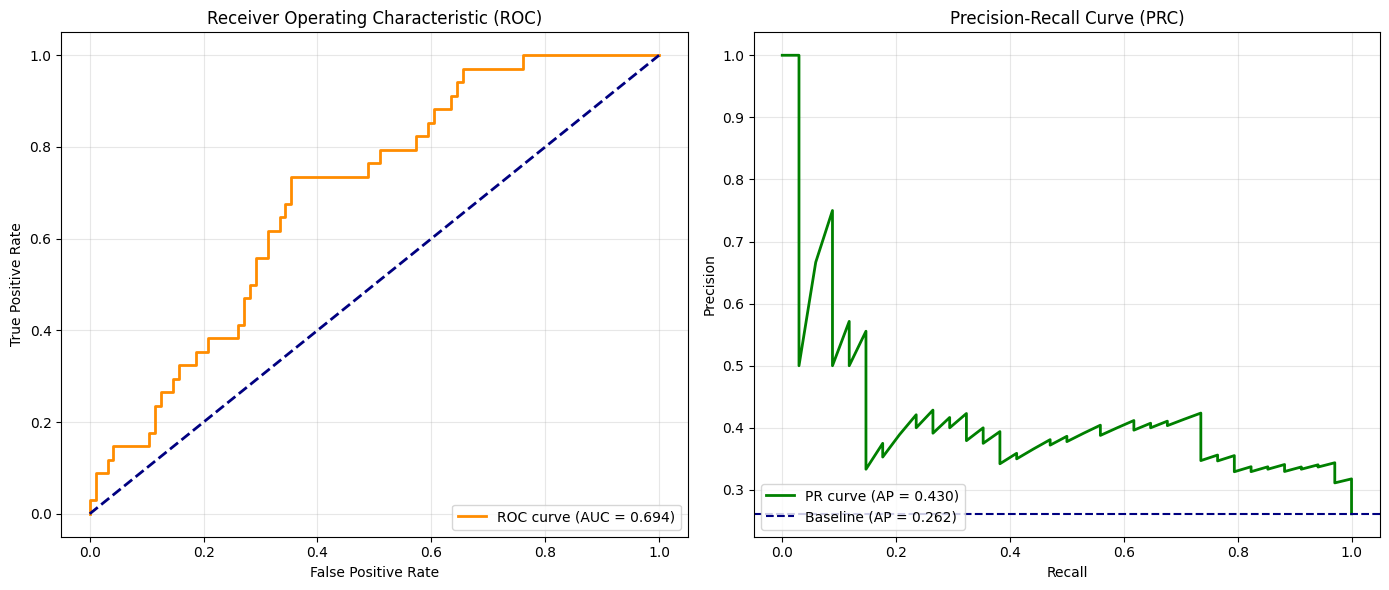


✅ MobileNetV2 (Image Only) evaluation completed successfully!


In [9]:
from glaucoma_vision.models.evaluate_mobilenet import evaluate_mobilenet, mobilenet_integrate
MOBIL_PATH = os.path.join(WEIGHTS_DIR,'mobilenet.pth')
metrix = evaluate_mobilenet(
        model_path=MOBIL_PATH,
        val_dir=VAL_DIR,
        save_dir=SAVE_DIR
    )

Using device: cpu
Loading CSV metadata from: /Users/apple/Desktop/BIA 4/glaucoma.csv.xls
Scanning Validation Dir: /Users/apple/Desktop/BIA 4/Fundus_Scanes_Sorted/Validation ...
Validation Classes Mapping: {'Glaucoma_Negative': 0, 'Glaucoma_Positive': 1}
Validation Samples: 130
Loading hybrid model from /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/mobilenet_integrated.pth...
Model weights loaded successfully.
Running inference on validation set...

MobileNetV2 (Hybrid) Classification Report
                   precision    recall  f1-score   support

Glaucoma_Negative      0.846     0.458     0.595        96
Glaucoma_Positive      0.333     0.765     0.464        34

         accuracy                          0.538       130
        macro avg      0.590     0.612     0.529       130
     weighted avg      0.712     0.538     0.561       130
Summary Metrics:
Accuracy Score: 0.5385
AUROC Score: 0.6517
AUPRC Score: 

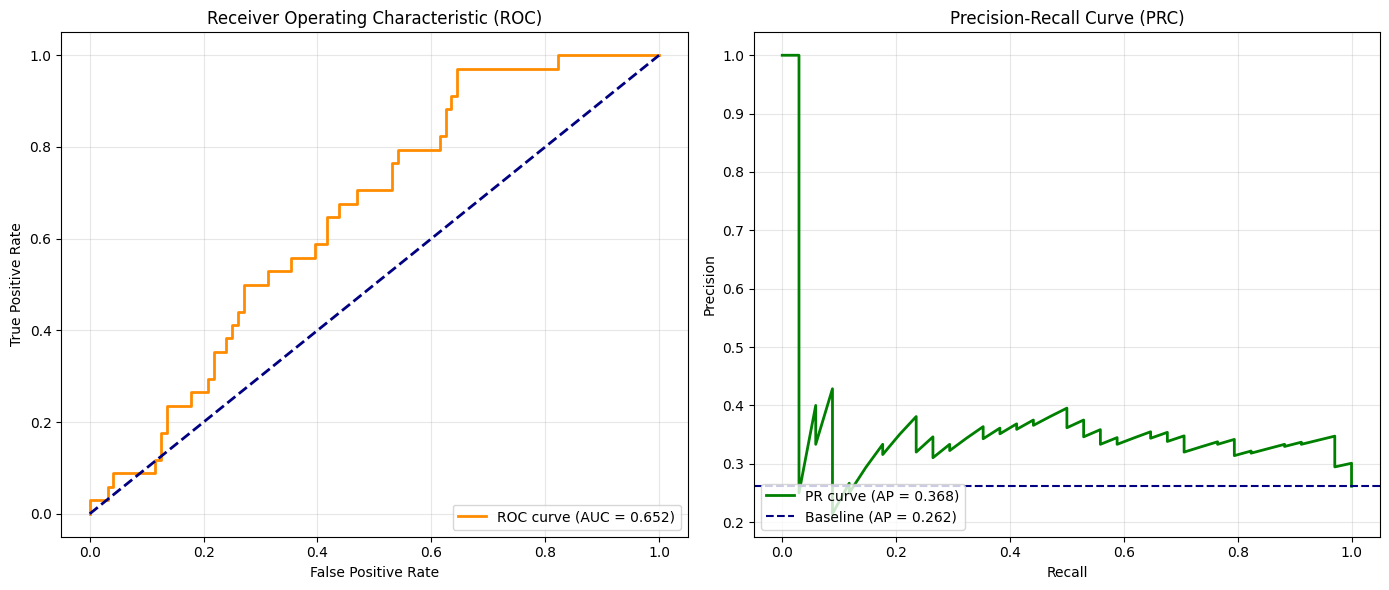


✅ MobileNetV2 (Hybrid) evaluation completed successfully!


In [10]:
MOBIL_INT_PATH = os.path.join(WEIGHTS_DIR,'mobilenet_integrated.pth')
hybrid_metrics = mobilenet_integrate(
        model_path=MOBIL_INT_PATH,
        val_dir=VAL_DIR,
        csv_path=CSV_PATH,
        save_dir=SAVE_DIR
    )

Loading model from /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/RF...
Model loaded successfully.
Validation Classes Mapping: {'Glaucoma_Negative': 0, 'Glaucoma_Positive': 1}
Validation Samples: 130
Running inference on validation set...

Random Forest Classification Report
                   precision    recall  f1-score   support

Glaucoma_Negative      0.768     0.896     0.827        96
Glaucoma_Positive      0.444     0.235     0.308        34

         accuracy                          0.723       130
        macro avg      0.606     0.566     0.567       130
     weighted avg      0.683     0.723     0.691       130
Summary Metrics:
Accuracy Score: 0.7231
AUROC Score: 0.5530
AUPRC Score: 0.3630


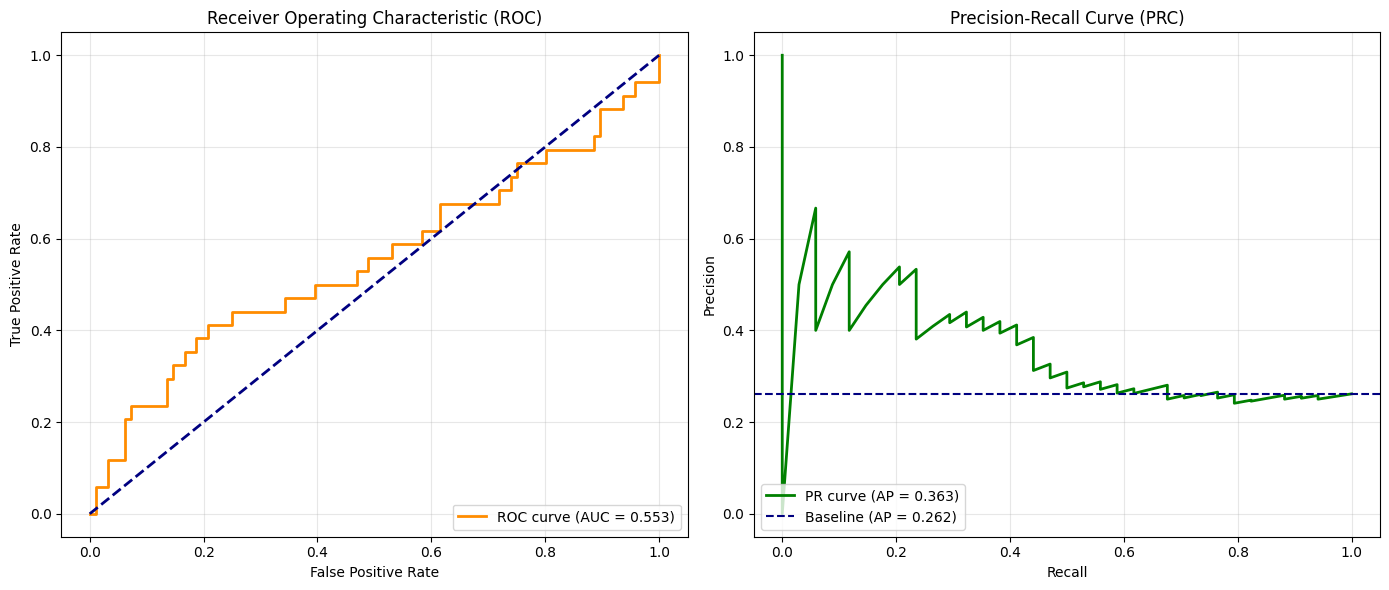


✅ Random Forest evaluation completed successfully!


In [11]:
from glaucoma_vision.models.evaluate_rf import evaluate_rf, rf_integrate
RF_PATH = os.path.join(WEIGHTS_DIR, 'RF')  # 模型权重文件路径
eval_results = evaluate_rf(RF_PATH, VAL_DIR, SAVE_DIR)

Loading CSV metadata from: /Users/apple/Desktop/BIA 4/glaucoma.csv.xls
Loading integrated model from /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/RF_integrated...
Model weights loaded successfully.
Validation Classes Mapping: {'Glaucoma_Negative': 0, 'Glaucoma_Positive': 1}
Validation Samples: 130
Running inference on validation set...

Integrated Model Classification Report
                   precision    recall  f1-score   support

Glaucoma_Negative      0.769     0.833     0.800        96
Glaucoma_Positive      0.385     0.294     0.333        34

         accuracy                          0.692       130
        macro avg      0.577     0.564     0.567       130
     weighted avg      0.669     0.692     0.678       130
Summary Metrics:
Accuracy Score: 0.6923
AUROC Score: 0.6471
AUPRC Score: 0.3881


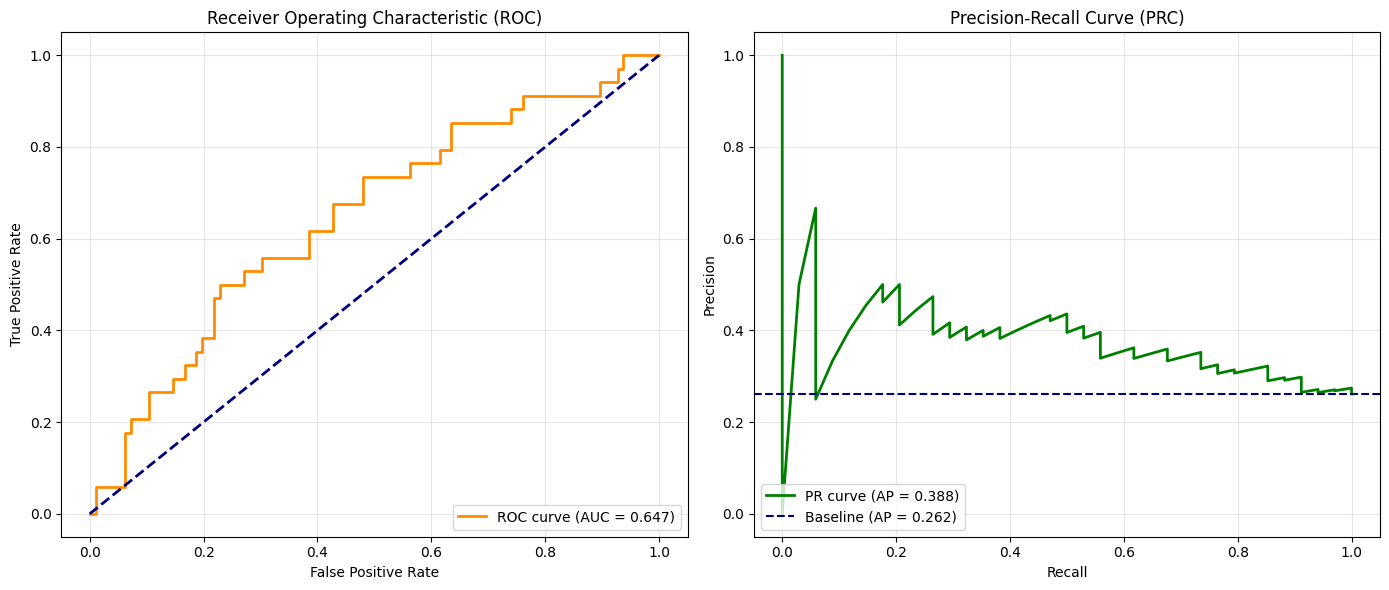


✅ Integrated Random Forest evaluation completed successfully!


In [12]:
RF_INT_PATH = os.path.join(WEIGHTS_DIR, 'RF_integrated')  # 模型权重文件路径
eval_results = rf_integrate(RF_INT_PATH, VAL_DIR, SAVE_DIR, CSV_PATH)

Loading CSV metadata from: /Users/apple/Desktop/BIA 4/glaucoma.csv.xls
Validation Classes Mapping: {'Glaucoma_Negative': 0, 'Glaucoma_Positive': 1}
Validation Samples: 130
Running inference on validation set...
Loading model from /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/svm.pkl...
Model loaded successfully.

SVM Classification Report
                   precision    recall  f1-score   support

Glaucoma_Negative      0.766     0.854     0.808        96
Glaucoma_Positive      0.391     0.265     0.316        34

         accuracy                          0.700       130
        macro avg      0.579     0.559     0.562       130
     weighted avg      0.668     0.700     0.679       130
Summary Metrics:
Accuracy Score: 0.7000
AUROC Score: 0.6952
AUPRC Score: 0.4162


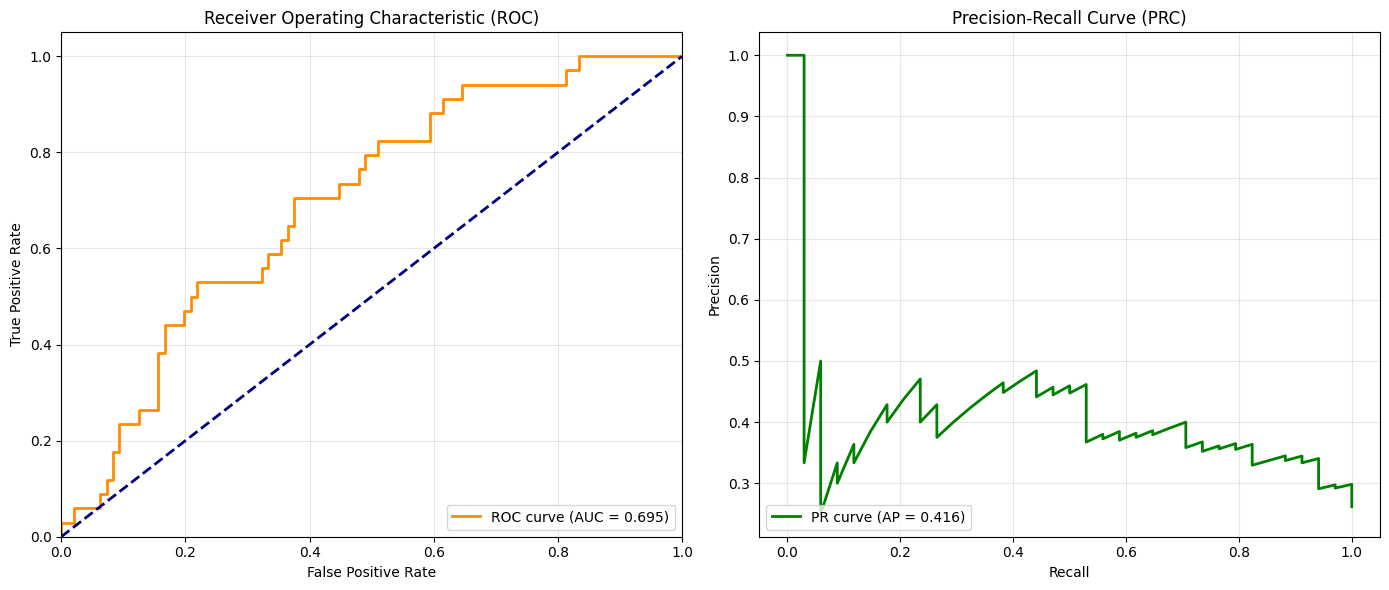


✅ SVM evaluation completed successfully!


In [13]:
from glaucoma_vision.models.evaluate_svm import evaluate_svm, svm_integrate
SVM_PATH = os.path.join(WEIGHTS_DIR, 'svm.pkl')  # 模型权重文件路径
eval_results = evaluate_svm(SVM_PATH, CSV_PATH, VAL_DIR, SAVE_DIR)

Loading CSV metadata from: /Users/apple/Desktop/BIA 4/glaucoma.csv.xls
Validation Classes Mapping: {'Glaucoma_Negative': 0, 'Glaucoma_Positive': 1}
Validation Samples: 130
Loading integrated model from /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/svm_integrated.pkl...
Model weights loaded successfully.
Running inference on validation set...

Integrated Model Classification Report
                   precision    recall  f1-score   support

Glaucoma_Negative      0.786     0.844     0.814        96
Glaucoma_Positive      0.444     0.353     0.393        34

         accuracy                          0.715       130
        macro avg      0.615     0.598     0.604       130
     weighted avg      0.697     0.715     0.704       130
Summary Metrics:
Accuracy Score: 0.7154
AUROC Score: 0.6915
AUPRC Score: 0.4072


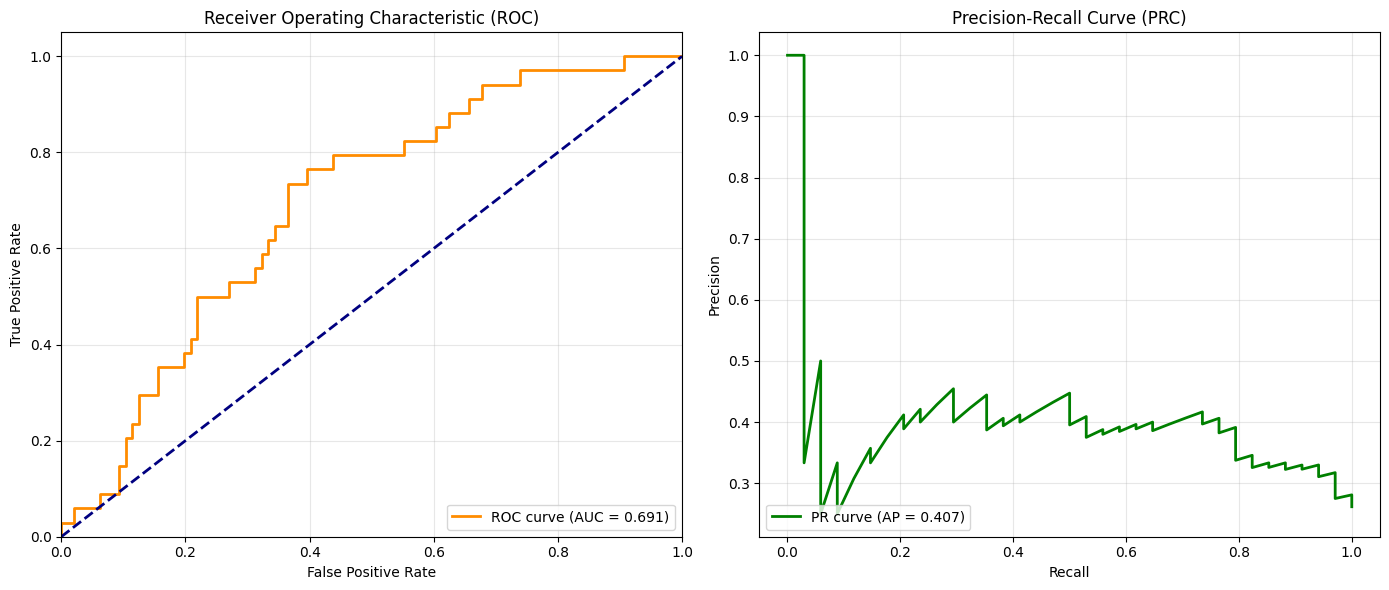


✅ Integrated SVM evaluation completed successfully!


In [14]:
SVM_INT_PATH = os.path.join(WEIGHTS_DIR, 'svm_integrated.pkl')  # 模型权重文件路径
eval_results = svm_integrate(SVM_INT_PATH, VAL_DIR, CSV_PATH,SAVE_DIR)

Validation Classes Mapping: {'Glaucoma_Negative': 0, 'Glaucoma_Positive': 1}


Extracting features: 100%|██████████| 650/650 [00:01<00:00, 423.28it/s] 


Validation Samples: 130 (Negative: 96, Positive: 34)
Loading model from /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/xgb.json...
Model loaded successfully.
Running inference on validation set...

XGBoost Classification Report
                   precision    recall  f1-score   support

Glaucoma_Negative      0.763     0.740     0.751        96
Glaucoma_Positive      0.324     0.353     0.338        34

         accuracy                          0.638       130
        macro avg      0.544     0.546     0.545       130
     weighted avg      0.649     0.638     0.643       130
Summary Metrics:
Accuracy Score: 0.6385
AUROC Score: 0.5484
AUPRC Score: 0.3223


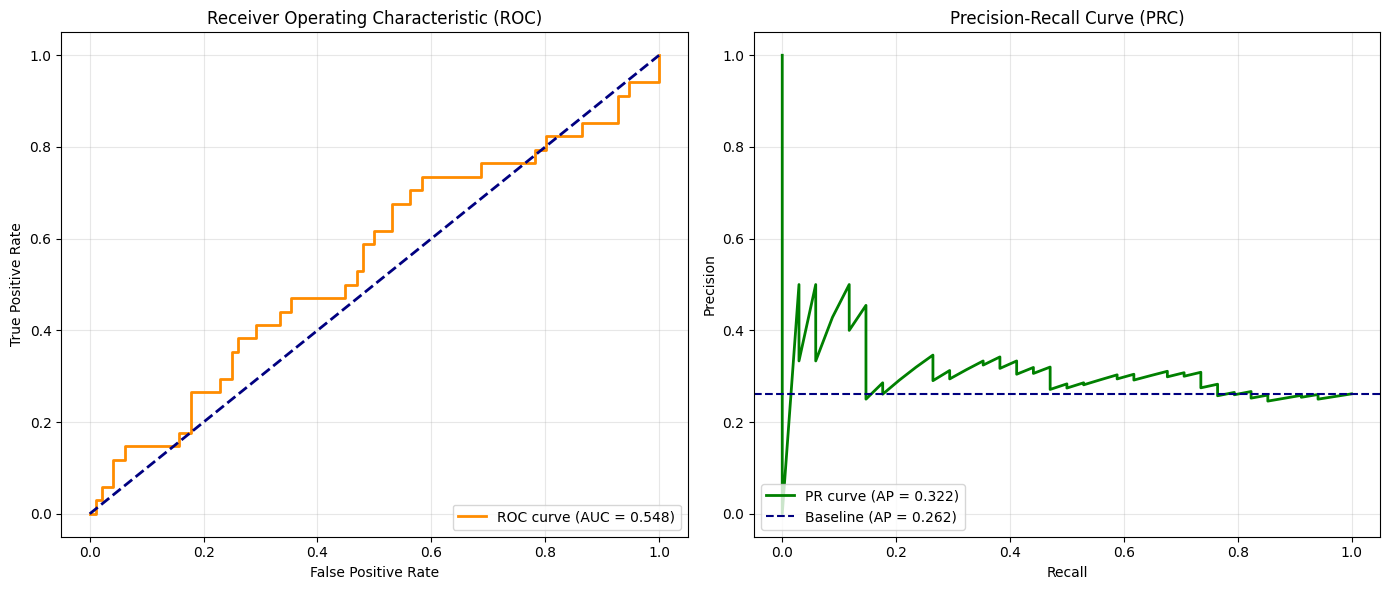


✅ XGBoost evaluation completed successfully!


In [15]:
from glaucoma_vision.models.evaluate_xgb import evaluate_xgb, xgb_integrate
XGB_PATH = os.path.join(WEIGHTS_DIR, 'xgb.json')  # 模型权重文件路径
eval_results = evaluate_xgb(XGB_PATH, VAL_DIR, CSV_PATH, SAVE_DIR)

Validation set directory: /Users/apple/Desktop/BIA 4/Fundus_Scanes_Sorted/Validation
Class folders: ['Glaucoma_Negative', 'Glaucoma_Positive']

Loading validation set data...
Validation Classes Mapping: {'Glaucoma_Negative': 0, 'Glaucoma_Positive': 1}
Total validation images found: 130
Negative samples: 96
Positive samples: 34


Processing sample data: 100%|██████████| 650/650 [00:01<00:00, 455.11it/s] 



Validation Samples: 130

Loading model and performing inference...

XGBoost (Hybrid Features) Classification Report
                   precision    recall  f1-score   support

Glaucoma_Negative      0.783     0.750     0.766        96
Glaucoma_Positive      0.368     0.412     0.389        34

         accuracy                          0.662       130
        macro avg      0.576     0.581     0.577       130
     weighted avg      0.674     0.662     0.667       130
Summary Metrics:
Accuracy Score: 0.6615
AUROC Score: 0.6661
AUPRC Score: 0.3793


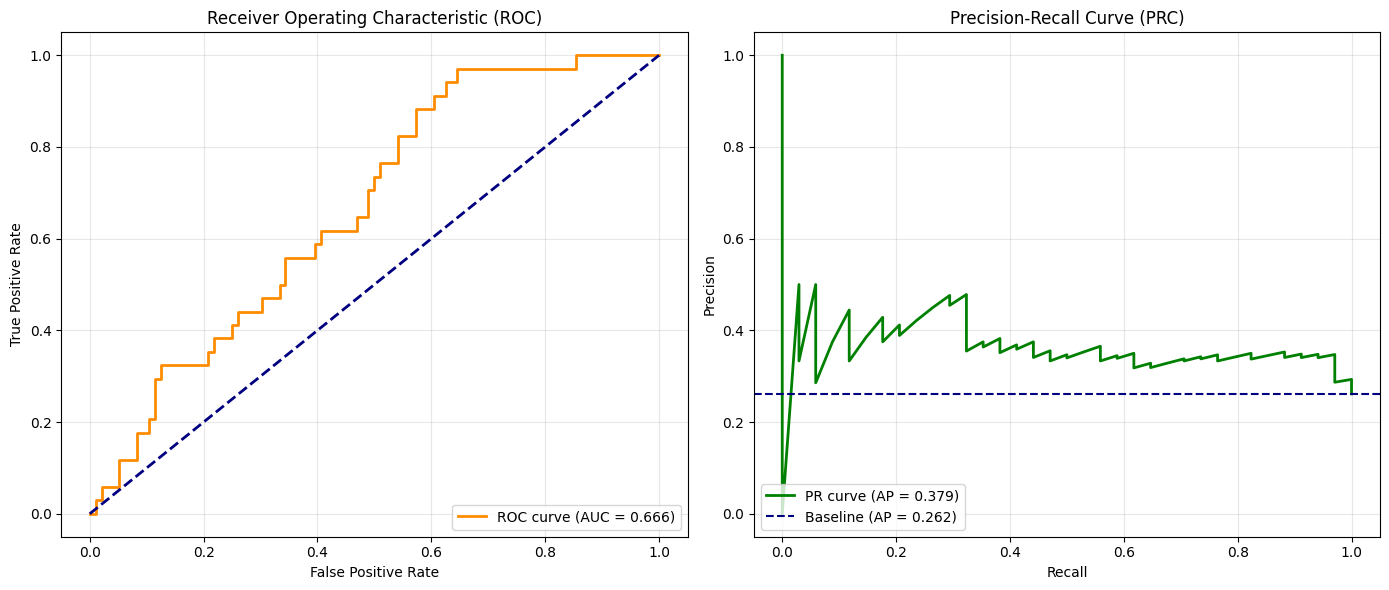


✅ XGBoost (Hybrid Features) evaluation completed successfully!


In [16]:
XGB_INT_PATH = os.path.join(WEIGHTS_DIR, 'xgb_integrated.json')  # 模型权重文件路径
eval_results = xgb_integrate(XGB_INT_PATH, VAL_DIR, CSV_PATH, SAVE_DIR)